In [1]:
import platform
print('python: '+platform.python_version())
import numpy as np
print('numpy: '+np.__version__)
import matplotlib
print('matplotlib: '+matplotlib.__version__)
import matplotlib.pyplot as plt
import pandas as pd
import sys
import open3d as o3d
print('open3d: '+o3d.__version__)

python: 3.9.12
numpy: 1.21.5
matplotlib: 3.5.1
Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
open3d: 0.15.1


Uploading data

In [2]:
#hdf=pd.HDFStore('C:\\Users\\leon-\\Documents\\Tesis\\Codigo\\test.h5', mode='r')
hdf=pd.HDFStore('test.h5', mode='r')
hdf.keys()

['/', '/table']

In [3]:
df=hdf.get('/table')
df=df.reset_index()
df=df.drop(['index'],axis=1)
df

,E_0,PX_0,PY_0,PZ_0,E_1,PX_1,PY_1,PZ_1,E_2,PX_2,...,E_199,PX_199,PY_199,PZ_199,truthE,truthPX,truthPY,truthPZ,ttv,is_signal_new
0,218.364243,-172.341858,110.129105,-76.503624,153.661118,-111.320465,93.167969,-50.390713,76.708054,-56.523701,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1,0
1,122.238762,26.738468,-91.613998,76.382225,121.227135,17.644758,-93.015450,75.715302,90.420105,21.377417,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1,0
2,383.772308,-97.906456,79.640709,-362.426361,200.625992,-54.921326,37.994343,-189.184753,123.247223,-33.828953,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1,0
3,132.492752,-77.763947,-87.322601,-62.304600,83.946594,-49.450481,-53.823605,-41.288010,28.072624,-19.964916,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1,0
4,730.786987,-209.120010,-193.454315,-672.973877,225.477325,-75.363350,-66.226990,-201.926651,217.040192,-63.698189,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403995,169.716614,-122.102844,36.656090,112.031059,112.158615,-80.692657,24.224476,74.036636,86.687820,-60.876274,...,0.0,0.0,0.0,0.0,832.899963,-572.147461,249.778381,524.242310,1,1
403996,287.591492,-81.565056,-140.493576,237.313202,160.357544,-34.246628,-88.843933,129.028931,105.006508,-30.313942,...,0.0,0.0,0.0,0.0,1014.205322,-213.806396,-476.465851,852.417358,1,1
403997,91.996681,60.538616,-63.476665,27.734055,93.122139,60.690456,-61.697636,34.377369,67.617706,33.402180,...,0.0,0.0,0.0,0.0,659.905701,419.718506,-414.999115,239.802658,1,1
403998,132.474686,35.062359,125.736656,22.593466,61.466259,7.588309,55.307018,25.722607,53.369095,17.563345,...,0.0,0.0,0.0,0.0,659.797302,39.736858,593.325745,230.296585,1,1


In [34]:
df.iloc[5559]=df.iloc[5560]
df.iloc[5559]

E_0              102.889175
PX_0              34.396488
PY_0             -96.054604
PZ_0              13.288250
E_1               97.891602
                    ...    
truthPX          314.900391
truthPY         -424.430573
truthPZ          100.279305
ttv                1.000000
is_signal_new      1.000000
Name: 5559, Length: 806, dtype: float64

Dataset 40x40

In [4]:
dftrain=df.iloc[0:30000].reset_index()
dftrain=dftrain.drop(['index'],axis=1)
dftest=df.iloc[30000:40000].reset_index()
dftest=dftest.drop(['index'],axis=1)
dfval=df.iloc[40000:50000].reset_index()
dfval=dfval.drop(['index'],axis=1)
dftrain

,E_0,PX_0,PY_0,PZ_0,E_1,PX_1,PY_1,PZ_1,E_2,PX_2,...,E_199,PX_199,PY_199,PZ_199,truthE,truthPX,truthPY,truthPZ,ttv,is_signal_new
0,218.364243,-172.341858,110.129105,-76.503624,153.661118,-111.320465,93.167969,-50.390713,76.708054,-56.523701,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,122.238762,26.738468,-91.613998,76.382225,121.227135,17.644758,-93.015450,75.715302,90.420105,21.377417,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2,383.772308,-97.906456,79.640709,-362.426361,200.625992,-54.921326,37.994343,-189.184753,123.247223,-33.828953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,132.492752,-77.763947,-87.322601,-62.304600,83.946594,-49.450481,-53.823605,-41.288010,28.072624,-19.964916,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
4,730.786987,-209.120010,-193.454315,-672.973877,225.477325,-75.363350,-66.226990,-201.926651,217.040192,-63.698189,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,107.598961,-86.493256,-37.625134,51.776459,83.556297,-69.174370,-35.723881,30.337543,69.006447,-53.915443,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
29996,40.411552,35.681664,15.854855,-10.418072,41.870693,28.990129,23.265043,-19.273426,33.280991,24.119259,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
29997,247.267456,18.934837,-119.225204,-215.796234,139.735626,9.669763,-66.933296,-122.280319,130.134888,9.838408,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
29998,230.381836,114.787895,91.257820,177.683823,177.950272,87.036385,67.774910,139.633560,139.115097,67.835197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


Labels

In [5]:
labeltr=dftrain
labeltr=np.asarray(labeltr.loc[:,'is_signal_new'])
labelte=dftest
labelte=np.asarray(labelte.loc[:,'is_signal_new'])

In [6]:
np.save('labeltr',labeltr)
np.save('labelte',labelte)

Train set is_signal_new
0    15080
1    14920
dtype: int64


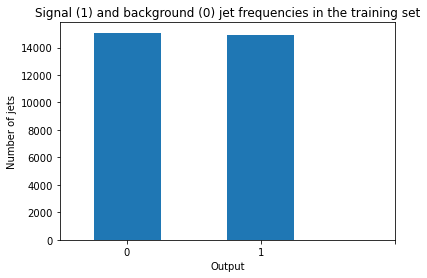

In [7]:
print('Train set', dftrain.groupby('is_signal_new').size())

clases = pd.value_counts(dftrain['is_signal_new'], sort = True)
clases.plot(kind = 'bar', rot=0)
plt.xticks(range(3))
plt.title("Signal (1) and background (0) jet frequencies in the training set")
plt.xlabel("Output")
plt.ylabel("Number of jets");


Test set is_signal_new
0    5020
1    4980
dtype: int64


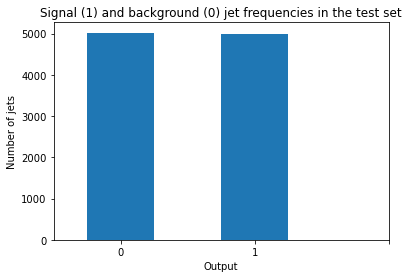

In [8]:
print('Test set', dftest.groupby('is_signal_new').size())
clases1 = pd.value_counts(dftest['is_signal_new'], sort = True)
clases1.plot(kind = 'bar', rot=0)
plt.xticks(range(3))
plt.title("Signal (1) and background (0) jet frequencies in the test set")
plt.xlabel("Output")
plt.ylabel("Number of jets");

In [9]:
n_idx=0
n_max=0
phi_max=0
w=0
A=[]
A_max=[]
n_8007=[]
n_20983=[]
phi_8007=[]
phi_20983=[]
E_8007=[]
E_20983=[]
n_27681=[]
phi_27681=[]
E_27681=[]
n_8192=[]
phi_8192=[]
E_8192=[]
for j in range(30000):
    E_max=0
    n=np.zeros(shape=100)
    phi=np.zeros(shape=100)
    En=np.zeros(shape=100)
   # if (j>5000):
    #    j=j+202000
        
    for i in range(100):
        df1 = dftrain.iloc[j:j+1,[0+4*i,1+4*i,2+4*i,3+4*i]]
        #print(df1)
        Px=df1.iloc[0][1]
        Py=df1.iloc[0][2]
        Pz=df1.iloc[0][3]
        E=df1.iloc[0][0]
        P=np.sqrt(Px**2+Py**2+Pz**2)
        if (P!=0):
            theta=np.arccos(Pz/P)
            n[i]=-np.log(np.tan(theta/2))
            if (n[i]<-2):
                n[i]=-2
            if (n[i]>2):
                n[i]=2
        else:
            n[i]=np.nan
        if (Px!=0):
            phi[i]=np.arctan(Py/Px)
        else:
            phi[i]=np.nan
        
        if (E!=0):
            En[i]=E
        else:
            En[i]=np.nan
        
        if (E>E_max):
            E_max=E
            n_idx=i
            
        if (abs(n[i])>n_max):
            n_max=abs(n[i])
        if (abs(phi[i]>phi_max)):
            phi_max=abs(phi[i])

        
    n1=n+2
    phi1=phi+(100*np.pi)/180 
    n2=np.round(n1/.1)
    phi2=np.round(phi1/(np.pi/36))
    n3=n2+(20-n2[0])
    phi3=phi2+(20-phi2[0])
    En1=np.zeros(shape=1600).reshape(40,40)
    En_max=np.zeros(shape=1600).reshape(40,40)
    
    for h in range(100):
        if (np.isnan(En[h])==False):
            g=int(phi2[h])
            k=int(n2[h])
            g1=int(phi3[h])
            k1=int(n3[h])
            if (g<40 and k<40):
               # if (En1[g][k]<En[h]):
                En1[g][k]=En1[g][k]+En[h]
            if (g1<40 and k1<40):
               # if (En1[g][k]<En[h]):
                En_max[g1][k1]=En_max[g1][k1]+En[h]
                
    if (j==8007 or j==20983 or j==27681 or j==8192):
        if (j==8007):
            n_8007=n
            phi_8007=phi
            E_8007=En
        elif (j==20983):
            n_20983=n
            phi_20983=phi
            E_20983=En
        elif (j==8192):
            n_8192=n
            phi_8192=phi
            E_8192=En
        elif (j==27681):
            n_27681=n
            phi_27681=phi
            E_27681=En
            
    A.append(En1)
    A_max.append(En_max)
Arr_max=np.asarray(A_max)
Arr=np.asarray(A)
Arr.shape

(30000, 40, 40)

In [10]:
np.save('Datatrain',Arr)

In [11]:
B=[]
for j in range(10000):
    n=np.zeros(shape=100)
    phi=np.zeros(shape=100)
    En=np.zeros(shape=100)
   # if (j>5000):
    #    j=j+202000
        
    for i in range(100):
        df1 = dftest.iloc[j:j+1,[0+4*i,1+4*i,2+4*i,3+4*i]]
        #print(df1)
        Px=df1.iloc[0][1]
        Py=df1.iloc[0][2]
        Pz=df1.iloc[0][3]
        E=df1.iloc[0][0]
        P=np.sqrt(Px**2+Py**2+Pz**2)
        if (P!=0):
            theta=np.arccos(Pz/P)
            n[i]=-np.log(np.tan(theta/2))
            if (n[i]<-2):
                n[i]=-2
            if (n[i]>2):
                n[i]=2
        else:
            n[i]=np.nan
        if (Px!=0):
            phi[i]=np.arctan(Py/Px)
        else:
            phi[i]=np.nan
        if (E!=0):
            En[i]=E
        else:
            En[i]=np.nan
    n1=n+2
    phi1=phi+(100*np.pi)/180
    #Fitting each couple n-phi into one of our 200x200 pixels 
    n2=np.round(n1/.1)
    phi2=np.round(phi1/(np.pi/36))
    En1=np.zeros(shape=1600).reshape(40,40)
    
    for h in range(100):
        if (np.isnan(En[h])==False):
            g=int(phi2[h])
            k=int(n2[h])
            if (g<40 and k<40):
                En1[g][k]=En1[g][k]+En[h]
    
    B.append(En1)
Arrtest=np.asarray(B)
Arrtest.shape

(10000, 40, 40)

In [12]:
np.save('Datatest',Arrtest)

# Plotting

In [13]:
n_200=np.round((n_27681+2)/.02)
phi_200=np.round((phi_27681+(100*np.pi)/180)/(np.pi/180))
En_200=np.zeros(shape=40000).reshape(200,200)
for h in range(100):
    if (np.isnan(E_27681[h])==False):
        g=int(phi_200[h])
        k=int(n_200[h])
        if (g<200 and k<200):
               # if (En1[g][k]<En[h]):
            En_200[g][k]=En_200[g][k]+E_27681[h]

In [14]:
n_40=np.round((n_27681+2)/.1)
phi_40=np.round((phi_27681+(100*np.pi)/180)/(np.pi/36))
En_40=np.zeros(shape=1600).reshape(40,40)
for h in range(100):
    if (np.isnan(E_27681[h])==False):
        g=int(phi_40[h])
        k=int(n_40[h])
        if (g<40 and k<40):
            if (En_40[g][k]<E_27681[h]):
                En_40[g][k]=E_27681[h]

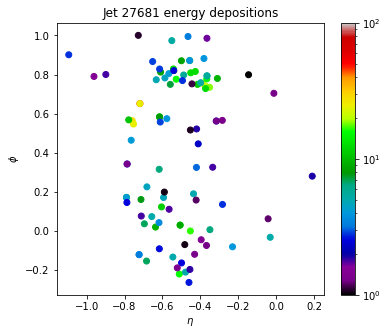

In [15]:
fig = plt.figure(figsize=(6,5))

ax = fig.add_subplot(111)

scat_plot =ax.scatter(n_27681,phi_27681,c=E_27681,cmap='nipy_spectral',norm=matplotlib.colors.LogNorm(vmin=1, vmax=100, clip=False))

ax.set_title("Jet 27681 energy depositions")

ax.set_xlabel("$\eta$")

ax.set_ylabel("$\phi$")


cb = plt.colorbar(scat_plot)

#cb.set_label('Energy (GeV)')


plt.show()

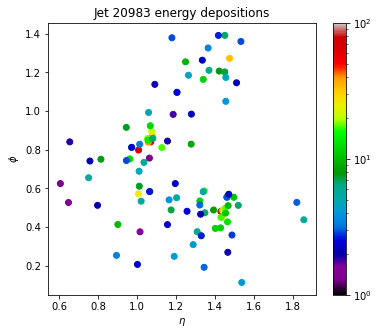

In [16]:
fig = plt.figure(figsize=(6,5))

ax = fig.add_subplot(111)

scat_plot =ax.scatter(n_20983,phi_20983,c=E_20983,cmap='nipy_spectral',norm=matplotlib.colors.LogNorm(vmin=1, vmax=100, clip=False))

ax.set_title("Jet 20983 energy depositions")

ax.set_xlabel("$\eta$")

ax.set_ylabel("$\phi$")


cb = plt.colorbar(scat_plot)

#cb.set_label('Energy (GeV)')



plt.show()

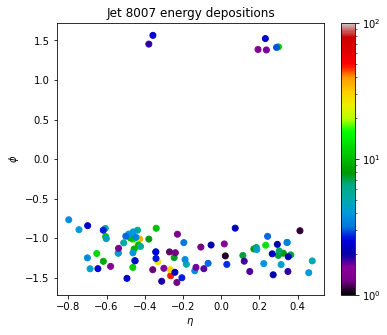

In [17]:
fig = plt.figure(figsize=(6,5))

ax = fig.add_subplot(111)

scat_plot =ax.scatter(n_8007,phi_8007,c=E_8007,cmap='nipy_spectral',norm=matplotlib.colors.LogNorm(vmin=1, vmax=100, clip=False))

ax.set_title("Jet 8007 energy depositions")

ax.set_xlabel("$\eta$")

ax.set_ylabel("$\phi$")


cb = plt.colorbar(scat_plot)

#cb.set_label('Energy (GeV)')


27681
plt.show()

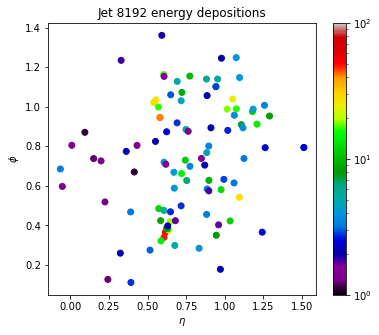

In [18]:
fig = plt.figure(figsize=(6,5))

ax = fig.add_subplot(111)

scat_plot =ax.scatter(n_8192,phi_8192,c=E_8192,cmap='nipy_spectral',norm=matplotlib.colors.LogNorm(vmin=1, vmax=100, clip=False))

ax.set_title("Jet 8192 energy depositions")

ax.set_xlabel("$\eta$")

ax.set_ylabel("$\phi$")


cb = plt.colorbar(scat_plot)

#cb.set_label('Energy (GeV)')


plt.show()

0.0


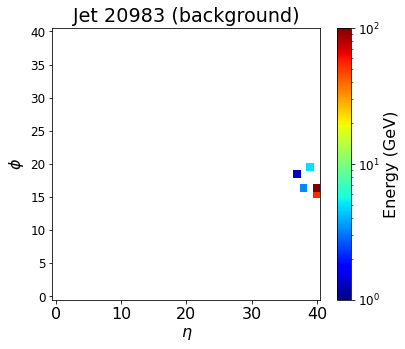

In [35]:
x = np.linspace(0,40,40)
y = np.linspace(0,40,40)
nv, phiv = np.meshgrid(x, y)

a= 5559

Enplot=Arr[a]

#Enplot[np.where(Enplot==0)] = np.nan
        
plt.figure(figsize=(6,5))
plot=plt.pcolor(x,y,Enplot, cmap='jet',norm=matplotlib.colors.LogNorm(vmin=1, vmax=100, clip=False))

cbar = plt.colorbar()

plt.xlabel('$\eta$')
plt.ylabel('$\phi$')
plt.title("Jet 20983 (background)")
cbar.set_label('Energy (GeV)')
print(dftrain.iloc[a][805])

1.0


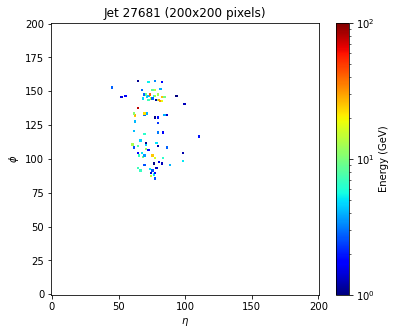

In [20]:
x = np.linspace(0,200,200)
y = np.linspace(0,200,200)
nv, phiv = np.meshgrid(x, y)

a= 27681

Enplot=En_200

#Enplot[np.where(Enplot==0)] = np.nan
        
plt.figure(figsize=(6,5))
plot=plt.pcolor(x,y,Enplot, cmap='jet',norm=matplotlib.colors.LogNorm(vmin=1, vmax=100, clip=False))

cbar = plt.colorbar()

plt.xlabel('$\eta$')
plt.ylabel('$\phi$')
plt.title("Jet 27681 (200x200 pixels)")
cbar.set_label('Energy (GeV)')
print(dftrain.iloc[a][805])

1.0


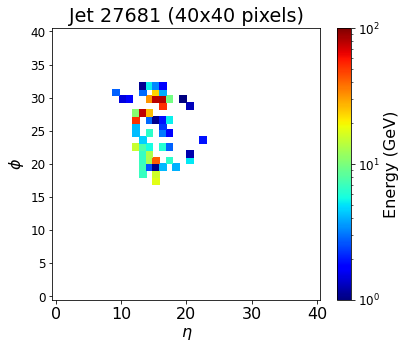

In [36]:
x = np.linspace(0,40,40)
y = np.linspace(0,40,40)
nv, phiv = np.meshgrid(x, y)

a= 27681

Enplot=Arr[a]

#Enplot[np.where(Enplot==0)] = np.nan
        
plt.figure(figsize=(6,5))
plot=plt.pcolor(x,y,Enplot, cmap='jet',norm=matplotlib.colors.LogNorm(vmin=1, vmax=100, clip=False))

cbar = plt.colorbar()

plt.xlabel('$\eta$')
plt.ylabel('$\phi$')
plt.title("Jet 27681 (40x40 pixels)")
cbar.set_label('Energy (GeV)')
print(dftrain.iloc[a][805])

In [22]:
aa=27681
E_aa=[]
px_aa=[]
py_aa=[]
pz_aa=[]
for i in range(100):
    E_aa.append(dftrain.iloc[aa][i*4])
    px_aa.append(dftrain.iloc[aa][i*4+1])
    py_aa.append(dftrain.iloc[aa][i*4+2])
    pz_aa.append(dftrain.iloc[aa][i*4+3])

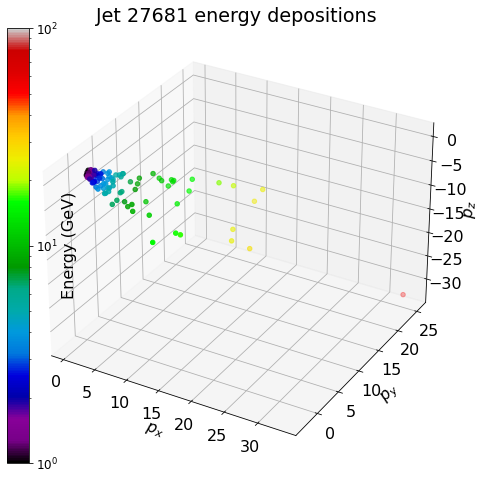

In [23]:
plt.rc('font', size=16) 
plt.rc('axes', labelsize=16)  
plt.rc('ytick', labelsize=12)

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

scat_plot =ax.scatter(px_aa,py_aa,pz_aa,c=E_aa,cmap='nipy_spectral',norm=matplotlib.colors.LogNorm(vmin=1, vmax=100, clip=False))

ax.set_title("Jet 27681 energy depositions")

ax.set_xlabel("$p_{x}$")

ax.set_ylabel("$p_{y}$")

ax.set_zlabel("$p_{z}$")


cb = plt.colorbar(scat_plot, pad=-1)

cb.set_label('Energy (GeV)')


#cb.set_ticks([E_aa[0],20])

#ax.set_xlim(-2,2)

#ax.set_ylim(-3.14,3.14)

plt.show()

In [24]:
backgrounds=np.zeros(shape=1600).reshape(40,40)
signals=np.zeros(shape=1600).reshape(40,40)
ba=0
si=0
for i in range(30000):
    if (dftrain.iloc[i][805]==0):
        backgrounds=backgrounds+Arr_max[i]
        ba=ba+1
    elif (dftrain.iloc[i][805]==1):
        signals=signals+Arr_max[i]
        si=si+1
backgrounds=backgrounds/ba
signals=signals/si

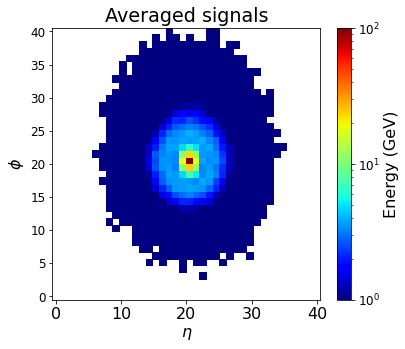

In [25]:
x = np.linspace(0,40,40)
y = np.linspace(0,40,40)
nv, phiv = np.meshgrid(x, y)


#Enplot[np.where(Enplot==0)] = np.nan
        
plt.figure(figsize=(6,5))
plot=plt.pcolor(x,y,signals, cmap='jet',norm=matplotlib.colors.LogNorm(vmin=1, vmax=100, clip=False))

cbar = plt.colorbar()

plt.xlabel('$\eta$')
plt.ylabel('$\phi$')
plt.title("Averaged signals")
cbar.set_label('Energy (GeV)')

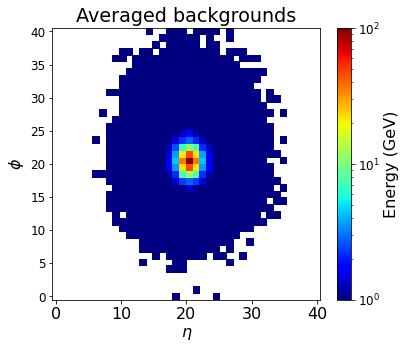

In [26]:
x = np.linspace(0,40,40)
y = np.linspace(0,40,40)
nv, phiv = np.meshgrid(x, y)


#Enplot[np.where(Enplot==0)] = np.nan
        
plt.figure(figsize=(6,5))
plot=plt.pcolor(x,y,backgrounds, cmap='jet',norm=matplotlib.colors.LogNorm(vmin=1, vmax=100, clip=False))

cbar = plt.colorbar()

plt.xlabel('$\eta$')
plt.ylabel('$\phi$')
plt.title("Averaged backgrounds")
cbar.set_label('Energy (GeV)')